In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1)Testing of House Price Prediction model based on lotsize**

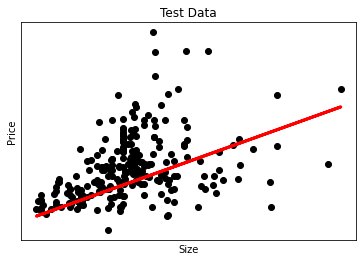

In [2]:
# Python code to illustrate 
# regression using data set
import matplotlib
#matplotlib.use('GTKAgg')
   
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd
   
# Load CSV and columns
df = pd.read_csv("/content/Housing.csv")
   
Y = df['price']
X = df['lotsize']
   
X=X.values.reshape(len(X),1)
Y=Y.values.reshape(len(Y),1)
   
# Split the data into training/testing sets
X_train = X[:-250]
X_test = X[-250:]
   
# Split the targets into training/testing sets
Y_train = Y[:-250]
Y_test = Y[-250:]
   
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.title('Test Data')
plt.xlabel('Size')
plt.ylabel('Price')
plt.xticks(())
plt.yticks(())
   
  
# Create linear regression object
regr = linear_model.LinearRegression()
   
# Train the model using the training sets
regr.fit(X_train, Y_train)
   
# Plot outputs
plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)
plt.show()


### **Test normally using assert**

In [3]:
try:
  assert regr.predict([[1670]]) <= 50000 
  print('Testcase Passed')
except AssertionError:
  print('Testcase Failed')

Testcase Passed


### **Test by putting boundries**

Specified Boundries:

  If lotsize is between 1650 and 4425, test case 1 should be passed.

    Test case 1: The price of house should between 25000 and 69000.

  If lotsize is between 4426 and 10500, test case 2 should be passed.

    Test case 2: The price of house should between 69001 and 163000.

In [4]:
 def TestCase1(func):
    def inner1(*args, **kwargs):
        returned_value = func(*args, **kwargs)
        if returned_value > 25000 and returned_value < 69000:
          return 'Test case passed.'
        else:
          return 'Test case failed.'
    return inner1

In [5]:
def TestCase2(func):
    def inner1(*args, **kwargs):
        returned_value = func(*args, **kwargs)
        if returned_value > 69001 and returned_value < 163000:
          return 'Test case passed.'
        else:
          return 'Test case failed.'
    return inner1

In [7]:
area = int(input("Enter area of house between 1650 to 105000: "))

if area<=4425 and area>=1650:
  @TestCase1
  def func(area):
     return regr.predict([[area]])[0][0]
  print(func(area))
elif area<=10500 and area>=4426:
  @TestCase2
  def func(area):
    return regr.predict([[area]])[0][0]
  print(func(area))
else:
  print('Provide key between 1650 to 10500')

Enter area of house between 1650 to 105000: 9000
Test case passed.


# **2)Testing of Image Classfication Model using Assert**


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np



In [9]:
labels = ['rugby', 'soccer']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [10]:
# Now we can easily fetch our train and validation data.
train = get_data("/content/drive/MyDrive/input/train")
val = get_data("/content/drive/MyDrive/input/test")
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


In [11]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)


In [12]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [13]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [ ]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])


In [15]:
history = model.fit(x_train,y_train,epochs = 1 ,validation_data = (x_val, y_val))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


77/77 [==============================] - 164s 2s/step - loss: 0.6940 - accuracy: 0.5135 - val_loss: 0.6856 - val_accuracy: 0.5738


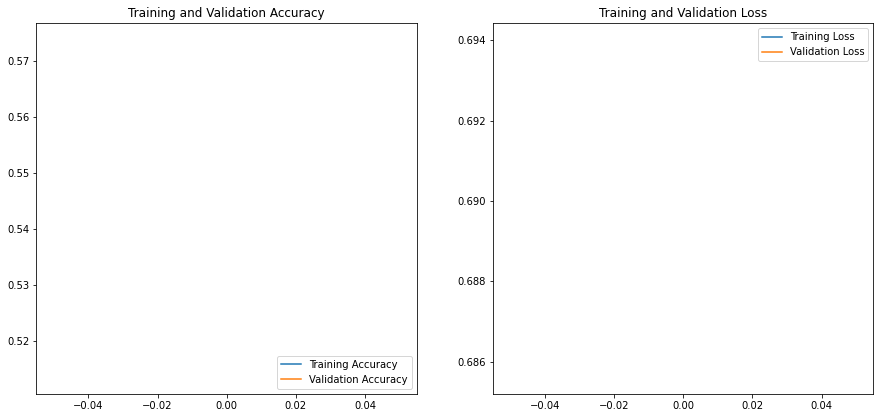

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
predictions = model.predict(x_val)

new_predictions = []
for i in range(610):
  if(predictions[i][0] > predictions[i][1]):
    new_predictions.append(0) 
  else:  
    new_predictions.append(1)

predictions = np.array(new_predictions)

print(predictions.shape)
print(y_val.shape)

print(classification_report(y_val, new_predictions, target_names = ['Rugby (Class 0)','Soccer (Class 1)']))


20/20 [==============================] - 10s 465ms/step
(610,)
(610,)
                  precision    recall  f1-score   support

 Rugby (Class 0)       0.59      0.47      0.52       305
Soccer (Class 1)       0.56      0.68      0.62       305

        accuracy                           0.57       610
       macro avg       0.58      0.57      0.57       610
    weighted avg       0.58      0.57      0.57       610





**Testing**

In [18]:
for i in range(0,20):
  try:
    assert predictions[i] == y_val[i]
    print('test Passesd')
  except AssertionError:
    print()
    print('Testing Failed')
    print('Predicted: ',predictions[i])
    print('True Value: ',y_val[i])
    print()

test Passesd

Testing Failed
Predicted:  1
True Value:  0


Testing Failed
Predicted:  1
True Value:  0

test Passesd
test Passesd

Testing Failed
Predicted:  1
True Value:  0


Testing Failed
Predicted:  1
True Value:  0


Testing Failed
Predicted:  1
True Value:  0


Testing Failed
Predicted:  1
True Value:  0


Testing Failed
Predicted:  1
True Value:  0


Testing Failed
Predicted:  1
True Value:  0


Testing Failed
Predicted:  1
True Value:  0


Testing Failed
Predicted:  1
True Value:  0

test Passesd
test Passesd
test Passesd

Testing Failed
Predicted:  1
True Value:  0

test Passesd

Testing Failed
Predicted:  1
True Value:  0

test Passesd
